In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('data_results/testing_results.csv')

In [4]:
df

,Unnamed: 0,model,accuracy,TN,FP,FN,TP
0,0,LogisticRegression,0.8839,4300,661,500,4539
1,1,DecisionTreeClassifier,0.7470,3289,1672,858,4181
2,2,MultinomialNB,0.8634,4323,638,728,4311
3,3,RandomForestClassifier,0.8423,4035,926,651,4388
4,4,LinearSVC,0.8903,4339,622,475,4564
5,5,MLPClassifier,0.8724,4309,652,624,4415


In [19]:
df.iloc[0].TN

4300

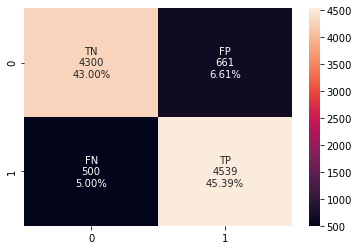

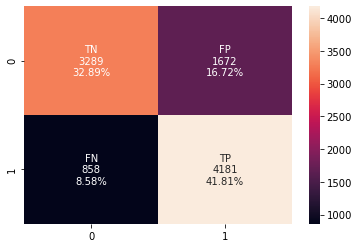

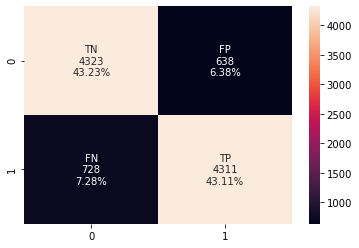

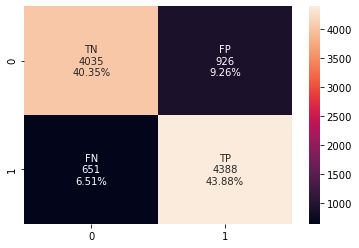

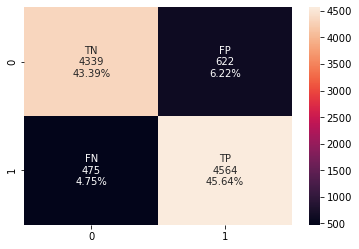

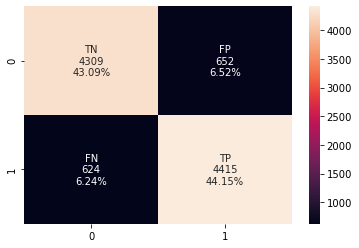

In [22]:
for index in range(len(df)):
    row = df.iloc[index]
    matrix = np.array([[row.TN, row.FP], [row.FN, row.TP]], dtype=int)

    vals_names = df.columns[3:]
    vals_percentages = ["{0:.2%}".format(value) for value in
                        matrix.flatten()/np.sum(matrix)]

    labels =[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(vals_names,df.loc[index].to_numpy()[3:],vals_percentages)]
    sns.heatmap(matrix, annot=np.asarray(labels).reshape(2,2), fmt='')
    plt.savefig(f'imgs/{row.model}_confusion_matrix.png')
    plt.show()
